<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression - Placement.csv**

In [2]:
import pandas as pd
df = pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df =  df.iloc[:, 1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


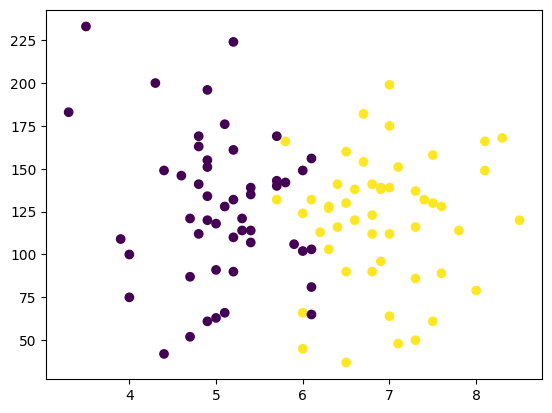

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])

In [12]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [13]:
y.shape #1D Tensor

(100,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [18]:
y_test

47    0
48    1
15    0
84    0
60    1
29    1
89    0
8     0
80    0
36    0
86    0
79    1
98    1
27    1
6     0
88    0
37    1
4     0
93    1
74    1
Name: placement, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.95

<Axes: >

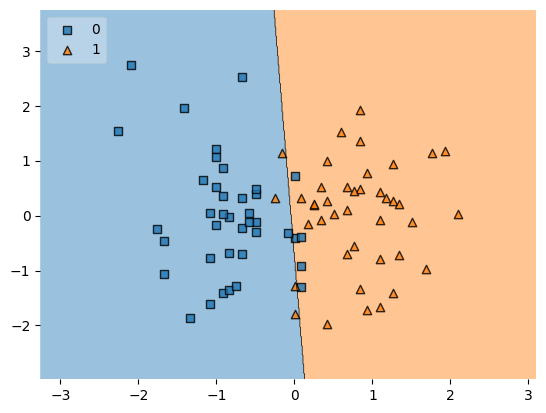

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf = lr, legend = 2)

In [24]:
import pickle
pickle.dump(lr, open("model.pkl","wb"))